# Tutorial Links
https://github.com/krishnaik06/Audio-Classification/blob/main/Audio%20Classification%20EDA.ipynb https://github.com/krishnaik06/Audio-Classification/blob/main/Part%20--%20Audio%20Classification%20Data%20Preprocessing%20And%20Model%20Creation.ipynb

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.feature
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import gc

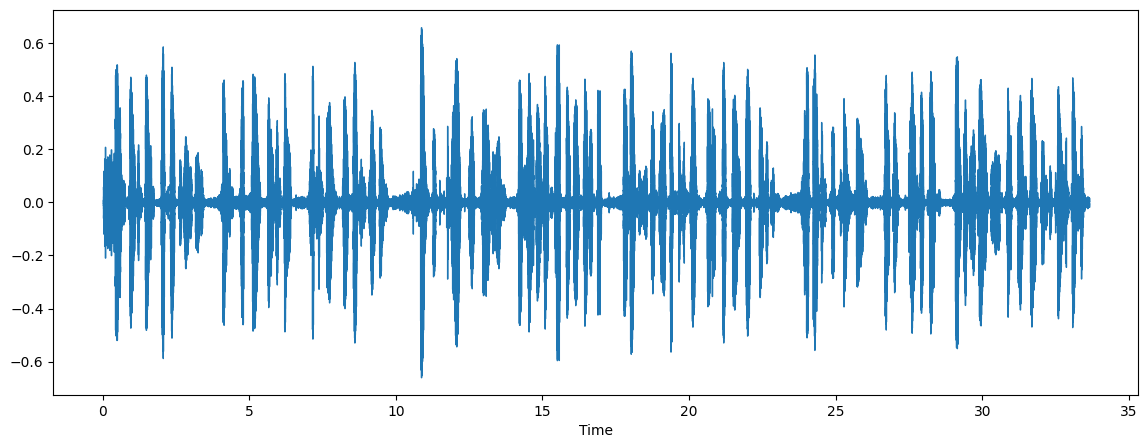

5374

In [2]:
#DATA EXPLORATION
a = 'C:'
b = 'Users'
c = 'hiloo'
d = 'Downloads'
e = 'archive'
f = 'recordings'
g = 'recordings'
h = 'spanish1.mp3'

filename = os.path.join(a + os.sep, b, c, d, e, f, g, h)

# plotting the audio
plt.figure(figsize=(14,5))
data,sr=librosa.load(filename)
librosa.display.waveshow(data,sr=sr)
plt.show()
gc.collect()

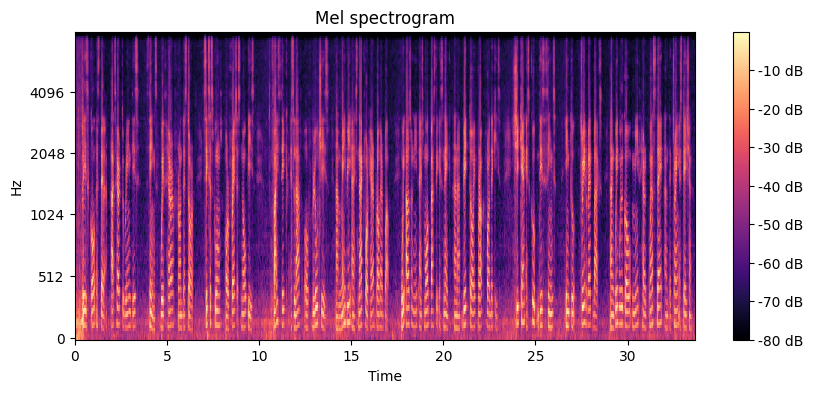

6009

In [3]:
# generate mel spectrogram
mel_sp = librosa.feature.melspectrogram(y=data, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_sp, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()
gc.collect()

In [2]:
# creating my dataframe
dict = {'filename': [],
        'class': []}

a = 'C:'
b = 'Users'
c = 'hiloo'
d = 'Downloads'
e = 'archive'
f = 'recordings'
g = 'recordings'

filedir = os.path.join(a + os.sep, b, c, d, e, f,g)
for root, dirs, files in os.walk(filedir):
    # getting file accent
    for file in files:
        name = file.split(".")[0]
        while not name.isalpha():
            name = name[:-1]
        dict['filename'].append(os.path.join(filedir,file))
        dict['class'].append(name)

df = pd.DataFrame(dict)
gc.collect()

0

In [3]:
print(df)
gc.collect()

                                               filename      class
0     C:\Users\hiloo\Downloads\archive\recordings\re...  afrikaans
1     C:\Users\hiloo\Downloads\archive\recordings\re...  afrikaans
2     C:\Users\hiloo\Downloads\archive\recordings\re...  afrikaans
3     C:\Users\hiloo\Downloads\archive\recordings\re...  afrikaans
4     C:\Users\hiloo\Downloads\archive\recordings\re...  afrikaans
...                                                 ...        ...
2133  C:\Users\hiloo\Downloads\archive\recordings\re...     yoruba
2134  C:\Users\hiloo\Downloads\archive\recordings\re...     yoruba
2135  C:\Users\hiloo\Downloads\archive\recordings\re...     yoruba
2136  C:\Users\hiloo\Downloads\archive\recordings\re...      yupik
2137  C:\Users\hiloo\Downloads\archive\recordings\re...       zulu

[2138 rows x 2 columns]


0

AUDIO AUGMENTATIONS TO ARTIFICIALLY INFLATE DATA

In [5]:
import audiomentations
from audiomentations import *

augment1 = audiomentations.Compose([
    AddGaussianNoise(min_amplitude=0.1, max_amplitude=0.2, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-5, max_semitones=5, p=0.5),
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5),
])

def apply_audio_transforms(file):
    y,sr = librosa.load(file)
    aug_y = augment1(y, sr)
    return aug_y

In [6]:
df_aug = df.copy()
df_aug
gc.collect()

18

In [7]:
from tqdm import tqdm
df_aug['filename'] = df_aug['filename'].progress_apply(apply_audio_transforms)
gc.collect()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2138/2138 [66:52:33<00:00, 112.61s/it]


1667

In [8]:
df_aug

,filename,class
0,"[0.007184119, 0.010595705, 0.008089414, 0.0093...",afrikaans
1,"[-0.029402904, 0.076551266, -0.09875063, 0.146...",afrikaans
2,"[-0.14169718, -0.14144051, 0.07465925, 0.26806...",afrikaans
3,"[0.00023523605, 0.00036833482, 0.00032975167, ...",afrikaans
4,"[0.009927041, -0.06789007, -0.039521065, -0.00...",afrikaans
...,...,...
2133,"[-0.010262627, -0.012004121, -0.005968467, -0....",yoruba
2134,"[0.0090860445, -0.11440906, -0.020967592, 0.07...",yoruba
2135,"[0.32743075, 0.00807282, 0.29190826, 0.0157218...",yoruba
2136,"[0.0018406254, 0.0022752937, 0.0025328596, 0.0...",yupik


In [10]:
def get_y(file):
    y,sr = librosa.load(file)
    return y
    
df['filename'] = df['filename'].progress_apply(get_y)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2138/2138 [05:13<00:00,  6.82it/s]


In [11]:
df = pd.concat([df,df_aug])
df

,filename,class
0,"[0.007184119, 0.010595705, 0.008089414, 0.0093...",afrikaans
1,"[-2.4659028e-05, -2.4604298e-05, -9.606478e-06...",afrikaans
2,"[0.0019971647, 0.00278731, 0.0013664484, 0.001...",afrikaans
3,"[0.00026092524, 0.00037868903, 0.00032889398, ...",afrikaans
4,"[7.998897e-06, 3.4950208e-06, -1.0875054e-05, ...",afrikaans
...,...,...
2133,"[-0.010262627, -0.012004121, -0.005968467, -0....",yoruba
2134,"[0.0090860445, -0.11440906, -0.020967592, 0.07...",yoruba
2135,"[0.32743075, 0.00807282, 0.29190826, 0.0157218...",yoruba
2136,"[0.0018406254, 0.0022752937, 0.0025328596, 0.0...",yupik


In [1]:
df

NameError: name 'df' is not defined

In [12]:
# shuffling dataset for randomness
# need to resample the classes so there is an even class
df = df.sample(frac=1, random_state=0, ignore_index=True)
print(df.head())
print(df.shape[0])
gc.collect()

                                            filename     class
0  [-0.0017731113, -0.0043775393, -0.0023867453, ...    french
1  [3.2812204e-06, 1.41416895e-05, -1.3481065e-05...  armenian
2  [-0.0008000654, -0.0017963968, -0.000630349, -...   italian
3  [4.009336e-06, -4.9493747e-06, 4.452112e-06, -...    arabic
4  [0.009220901, 0.013198652, 0.010974346, 0.0119...   rotuman
4276


1072

In [13]:
# creating feature extractor (Mel-Frequency Cepstral Coefficients(MFCC))
# summarizes frequency and time characteristics
from tqdm import tqdm
from librosa.util import fix_length
# for non-augmented data
def features_extractor(arr, aug=False):
    #audio = audio[:480000]
    pad_arr = fix_length(arr,size=30*22050)
    mfccs_features = librosa.feature.mfcc(y=pad_arr, sr=22050, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [15]:
df['feature'] = df['filename'].progress_apply(features_extractor)
df = df.drop(['filename'], axis=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4276/4276 [09:53<00:00,  7.20it/s]


In [29]:
df

,class,feature
0,french,"[-432.76083, 64.77125, -6.8899846, 31.454685, ..."
1,armenian,"[-378.334, 82.327705, 29.14727, 36.730774, -6...."
2,italian,"[-382.28894, 81.023575, 13.061696, 32.456326, ..."
3,arabic,"[-312.4204, 47.49743, -9.564252, 15.369576, 1...."
4,rotuman,"[-278.66867, 113.20862, -19.957476, 54.376087,..."
...,...,...
4271,gedeo,"[-282.36398, 101.98716, -18.525335, 49.551544,..."
4272,hindi,"[-320.4679, 112.44945, 8.41035, 10.900446, -12..."
4273,romanian,"[-357.8114, 121.21551, -36.966045, 31.458027, ..."
4274,english,"[-462.55078, 43.632187, 3.9857843, 20.657045, ..."


In [11]:
df3 = df.copy()

In [12]:
from collections import Counter
labels = [lang for lang, _ in Counter(df3['class']).most_common(2)]
df3 = df3[df3['class'].isin(labels)]
df3

,filename,class
331,C:\Users\hiloo\Downloads\archive\recordings\re...,english
332,C:\Users\hiloo\Downloads\archive\recordings\re...,english
333,C:\Users\hiloo\Downloads\archive\recordings\re...,english
334,C:\Users\hiloo\Downloads\archive\recordings\re...,english
335,C:\Users\hiloo\Downloads\archive\recordings\re...,english
...,...,...
1908,C:\Users\hiloo\Downloads\archive\recordings\re...,spanish
1909,C:\Users\hiloo\Downloads\archive\recordings\re...,spanish
1910,C:\Users\hiloo\Downloads\archive\recordings\re...,spanish
1911,C:\Users\hiloo\Downloads\archive\recordings\re...,spanish


In [16]:
df3['class'].value_counts()

class
english    579
spanish    162
Name: count, dtype: int64

In [53]:
df['class'].value_counts()

class
english        579
spanish        162
arabic         102
mandarin        65
french          63
              ... 
nandi            1
nama             1
mortlockese      1
moore            1
zulu             1
Name: count, Length: 200, dtype: int64

In [23]:
import audiomentations
from audiomentations import *

noise = audiomentations.Compose([
    AddGaussianNoise(min_amplitude=0.1, max_amplitude=0.2, p=1),
])
time_stretch = audiomentations.Compose([
    TimeStretch(min_rate=0.8, max_rate=1.25, p=1),
])
pitch_shift = audiomentations.Compose([
    PitchShift(min_semitones=-5, max_semitones=5, p=1),
])
shift = audiomentations.Compose([
    Shift(min_shift=-0.5, max_shift=0.5, p=1),
])


def apply_audio_transforms1(file):
    y,sr = librosa.load(file)
    aug_y = noise(y, sr)
    return aug_y
def apply_audio_transforms2(file):
    y,sr = librosa.load(file)
    aug_y = time_stretch(y, sr)
    return aug_y
def apply_audio_transforms3(file):
    y,sr = librosa.load(file)
    aug_y = pitch_shift(y, sr)
    return aug_y
def apply_audio_transforms4(file):
    y,sr = librosa.load(file)
    aug_y = shift(y, sr)
    return aug_y

In [17]:
# random undersampling of all but minority class
# Set the seed value for experiment reproducibility.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
y = df3[['class']]
df3, y_resampled = rus.fit_resample(df3, y)
del y
df3['label'] = y_resampled
del y_resampled
gc.collect()

36

In [19]:
df3['class'].value_counts()

class
english    162
spanish    162
Name: count, dtype: int64

In [20]:
from tqdm import tqdm
dn = df3.copy()
dts = df3.copy()
dps = df3.copy()
ds = df3.copy()
gc.collect()

54

In [21]:
def get_y(file):
    y,sr = librosa.load(file)
    return y
    
df3['filename'] = df3['filename'].progress_apply(get_y)

100%|██| 324/324 [00:40<00:00,  8.08it/s]


In [24]:
dn['filename'] = dn['filename'].progress_apply(apply_audio_transforms1)

100%|██| 324/324 [00:35<00:00,  9.16it/s]


In [25]:
dts['filename'] = dts['filename'].progress_apply(apply_audio_transforms2)

100%|██| 324/324 [02:51<00:00,  1.89it/s]


In [26]:
dps['filename'] = dps['filename'].progress_apply(apply_audio_transforms3)

100%|██| 324/324 [03:05<00:00,  1.75it/s]


In [27]:
ds['filename'] = ds['filename'].progress_apply(apply_audio_transforms4)

100%|██| 324/324 [00:29<00:00, 11.03it/s]


In [28]:
df4 = pd.concat([df3,dn,dts,dps,ds])
gc.collect()

408

In [30]:
df4 = df4.drop(['label'], axis=1)
df4

,filename,class
581,"[-3.0134537e-05, 2.2967353e-05, 3.8540343e-06,...",english
854,"[0.0010264217, 0.0009739545, 0.0005068623, 0.0...",english
891,"[0.043850113, 0.06474337, 0.056873918, 0.05888...",english
796,"[-0.0001326545, 0.00042535394, 0.00090674165, ...",english
686,"[-0.0030864945, -0.005174239, -0.0039260387, -...",english
...,...,...
1908,"[0.0977467, 0.12686208, 0.14955169, 0.16754393...",spanish
1909,"[-0.016656922, -0.019457933, -0.014846269, -0....",spanish
1910,"[-0.0010348642, -0.0016157427, -0.00035045808,...",spanish
1911,"[0.06557841, 0.065475896, 0.062570974, 0.05739...",spanish


In [33]:
# creating feature extractor (Mel-Frequency Cepstral Coefficients(MFCC))
# summarizes frequency and time characteristics
from tqdm import tqdm
from librosa.util import fix_length
# for non-augmented data
def features_extractor(arr, aug=False):
    #audio = audio[:480000]
    pad_arr = fix_length(arr,size=30*22050)
    mfccs_features = librosa.feature.mfcc(y=pad_arr, sr=22050, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [34]:
df4['feature'] = df4['filename'].progress_apply(features_extractor)
df4 = df4.drop(['filename'], axis=1)

100%|█| 1620/1620 [02:06<00:00, 12.82it/s


In [35]:
# shuffling dataset for randomness
# need to resample the classes so there is an even class
df4 = df4.sample(frac=1, random_state=0, ignore_index=True)
print(df4.head())
print(df4.shape[0])
gc.collect()

     class                                            feature
0  spanish  [17.205414, 1.3911941, 3.5704954, 2.4569993, 0...
1  spanish  [-486.57748, 84.05645, 9.770445, 5.880064, -7....
2  spanish  [-384.7246, 97.36547, 15.719871, 32.373096, 9....
3  spanish  [-363.64288, 108.87004, -20.495752, 33.495373,...
4  spanish  [-424.60217, 82.3524, -10.128723, 18.03704, 1....
1620


1320

In [36]:
# split dataset into independent and dependent
X = np.array(df4['feature'].tolist())
y = np.array(df4['class'].tolist())

print(X.shape)
print(y)

(1620, 40)
['spanish' 'spanish' 'spanish' ... 'english' 'english' 'english']


In [37]:
# label encoding
# used to convert categorical columns/labels into numerical ones
# so they can be used by machine learning programs
import tensorflow as tf
keras = tf.keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [38]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# creating the model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from sklearn import metrics

# number of classes
num_labels = y.shape[1] # num of columns

# setting up model
model=Sequential()
#first layer
# input shape is my x_train last dimension
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [40]:
# categorical_crossentropy measures loss between true and predicted labels
# used for multiclass classification problems
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [41]:
# Training the model
from keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 250
num_batch_size = 32

a = 'C:'
b = 'Users'
c = 'hiloo'
d = 'PycharmProjects'
e = 'audioClassificationSpectrograms'
f = 'saved_models'
g = 'accent_classification10_engspan.hdf5'

filepath = os.path.join(a + os.sep, b, c, d, e, f, g)
# saving my best model
checkpointer = ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test,y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/250
34/41 [=======================>......] - ETA: 0s - loss: 16.0370 - accuracy: 0.5083
Epoch 1: val_loss improved from inf to 0.87604, saving model to C:\Users\hiloo\PycharmProjects\audioClassificationSpectrograms\saved_models\accent_classification10_engspan.hdf5
41/41 [==============================] - 3s 21ms/step - loss: 15.2244 - accuracy: 0.5023 - val_loss: 0.8760 - val_accuracy: 0.5648
Epoch 2/250
 1/41 [..............................] - ETA: 0s - loss: 13.1691 - accuracy: 0.4688

C:\Users\hiloo\PycharmProjects\audioClassificationSpectrograms\venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - ETA: 0s - loss: 6.5006 - accuracy: 0.5478
Epoch 2: val_loss improved from 0.87604 to 0.64585, saving model to C:\Users\hiloo\PycharmProjects\audioClassificationSpectrograms\saved_models\accent_classification10_engspan.hdf5
41/41 [==============================] - 1s 13ms/step - loss: 6.5006 - accuracy: 0.5478 - val_loss: 0.6458 - val_accuracy: 0.6636
Epoch 3/250
38/41 [==========================>...] - ETA: 0s - loss: 4.3890 - accuracy: 0.5419
Epoch 3: val_loss did not improve from 0.64585
41/41 [==============================] - 0s 10ms/step - loss: 4.3524 - accuracy: 0.5401 - val_loss: 0.7102 - val_accuracy: 0.4938
Epoch 4/250
36/41 [=========================>....] - ETA: 0s - loss: 3.0243 - accuracy: 0.5182
Epoch 4: val_loss did not improve from 0.64585
41/41 [==============================] - 0s 11ms/step - loss: 2.8934 - accuracy: 0.5309 - val_loss: 0.6747 - val_accuracy: 0.5556
Epoch 5/250
36/41 [=========================>....] - ETA: 0s -

In [42]:
# testing accuracy
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.8703703880310059


In [45]:
from librosa.util import fix_length
def features_extractor2(file, aug=False):
    #audio = audio[:480000]
    arr = get_y(file)
    pad_arr = fix_length(arr,size=30*22050)
    mfccs_features = librosa.feature.mfcc(y=pad_arr, sr=22050, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [51]:
# english
a = 'C:'
b = 'Users'
c = 'hiloo'
d = 'PycharmProjects'
e = 'audioClassificationSpectrograms'
f = 'personalizedAudioClassification'
g = 'recordings'
h = 'english'
i = 'english316.mp3'

filepath = os.path.join(a + os.sep, b, c, d, e, f, g, h, i)
prediction_feature=features_extractor2(filepath)
prediction_feature=prediction_feature.reshape(1,-1)
print(prediction_feature)
predict=model.predict(prediction_feature) 
print(predict)
pred_test = np.argmax(predict, axis=-1)
print(pred_test)
prediction_class = label_encoder.inverse_transform(pred_test)
prediction_class

[[-3.7813403e+02  6.5191071e+01  2.7715330e+00  1.8428911e+01
   6.7056203e+00  5.3453522e+00  1.8870157e-01 -3.9031181e+00
  -3.3108730e+00 -3.7889709e+00 -5.1555800e-01  1.1148684e+00
  -6.0875030e+00  1.2344056e+00 -2.6537015e+00  3.3449748e+00
  -3.1599991e+00 -1.1381593e+00 -8.8050562e-01 -7.4715477e-01
  -1.3914838e+00 -1.4653610e+00 -2.1338558e+00 -1.8666036e+00
  -4.7468901e+00  4.9189305e-01 -1.3362361e+00 -3.7718022e-01
  -1.3804857e+00  5.7802171e-01 -1.6367304e+00 -1.0229582e+00
  -2.9230199e+00 -4.0972617e-01 -2.8112407e+00  3.9592212e-01
  -1.2217814e+00 -1.5296908e-01 -2.1125586e+00  6.5432709e-01]]
1/1 [==============================] - 1s 652ms/step
[[0.6957618  0.30423823]]
[0]


array(['english'], dtype='<U7')

In [52]:
# spanish
a = 'C:'
b = 'Users'
c = 'hiloo'
d = 'PycharmProjects'
e = 'audioClassificationSpectrograms'
f = 'personalizedAudioClassification'
g = 'recordings'
h = 'spanish'
i = 'spanish74.mp3'

filepath = os.path.join(a + os.sep, b, c, d, e, f, g, h, i)
prediction_feature=features_extractor2(filepath)
prediction_feature=prediction_feature.reshape(1,-1)
print(prediction_feature)
predict=model.predict(prediction_feature) 
print(predict)
pred_test = np.argmax(predict, axis=-1)
print(pred_test)
prediction_class = label_encoder.inverse_transform(pred_test)
prediction_class

[[-3.4360339e+02  5.5338707e+01  1.6245335e+01  1.9073215e+01
  -1.9557667e+00 -2.2768936e+00 -7.1796517e+00 -3.5247066e+00
  -5.0540614e+00 -2.9400094e+00 -1.1092368e+01 -1.8119962e+00
  -5.8399248e+00 -3.4896278e+00 -5.7751403e+00 -5.0431285e+00
  -6.9503517e+00 -3.4308183e-01 -3.6123931e+00 -3.9368489e+00
  -8.6542767e-01  2.5516131e+00 -5.0750308e+00 -4.0810432e+00
   1.1827950e+00  1.3003356e+00 -8.3639994e+00 -7.8370924e+00
  -4.8199544e+00 -2.7472456e+00 -6.6190476e+00 -3.7019980e+00
  -5.1052933e+00 -5.4119835e+00 -6.5838742e+00 -2.9777806e+00
  -7.5468855e+00 -5.1329317e+00 -1.7576870e+00 -4.6599407e+00]]
1/1 [==============================] - 0s 126ms/step
[[0.0479772 0.9520228]]
[1]


array(['spanish'], dtype='<U7')

In [50]:
y,sr = librosa.load(filepath)

#resample = librosa.resample(y,sr,8000)

22050
